# Stroop Test Results Analysis

In this report, we are going to look at the Stroop test results and see if there any significant difference between the different test conditions.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import ttest_ind,ttest_rel

stroop_df=pd.read_csv('stroopdata.csv')
stroop_df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [3]:
stroop_df.shape

(24, 2)

There are 24 sample points in this data set (n=24).

Q1: The independet variable is whether the words and the color of the words are congruent or incongruent. The dependent variable in this experiment is the total time taken for the participant to correctly name the color for a list of words.

Q2: Null hypothesis: The mean time taken for the population to correctly name the color for congruent and incongruent list of words are the same. 
H0: uI = uC where uI is the population mean of the time taken for the incongruent test while uC is the population mean of the time taken for the congruent test

Alternative hypothesis: The mean time taken for population to correctly name the color for incongruent words is greater than congruent words
Ha: uI > uC where uI is the population mean of the time taken for the incongruent test while uC is the population mean of the time taken for the congruent test

We are going to test this using two sample one-tailed t test to see if there is actually a significant difference between the two conditions. We are using one tailed instead of two tailed because we hypothesize that incongruenity makes it more difficult to name the colors, hence a longer time is needed for the participant to name all the colors. I chose to use t test instead of z test because z score comparison is usually used when you know the population parameters. In our case, we only have the sample description. Also, since our sample number is below 30, we cannot assume that our sample follows a normal distribution. A t test that uses a t distribution is more appropriate since it will take account of this higher uncertainty for having a smaller sample size.

Q3: We are going to look at the median and mean as well as the variance and standard deviation of the sample for both congruent and incongruent test groups.

In [4]:
stroop_df.apply(np.mean)

Congruent      14.051125
Incongruent    22.015917
dtype: float64

In [5]:
stroop_df.apply(np.median)

Congruent      14.3565
Incongruent    21.0175
dtype: float64

In [6]:
stroop_df.apply(np.var)

Congruent      12.141153
Incongruent    22.052934
dtype: float64

In [7]:
np.std(stroop_df,ddof=1) #standard error for sample

Congruent      3.559358
Incongruent    4.797057
dtype: float64

Q4: Now we are going to plot the distribution to a histogram

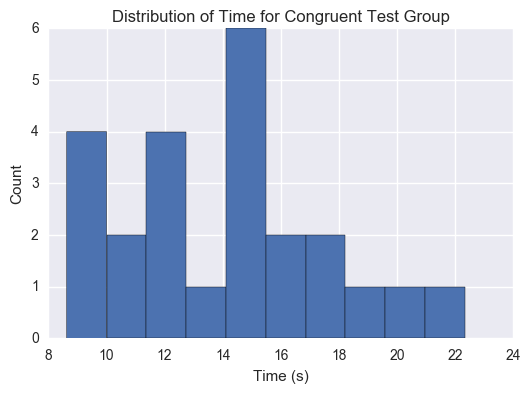

In [8]:
plt.hist(stroop_df['Congruent'])
plt.title('Distribution of Time for Congruent Test Group')
plt.xlabel('Time (s)')
plt.ylabel('Count')

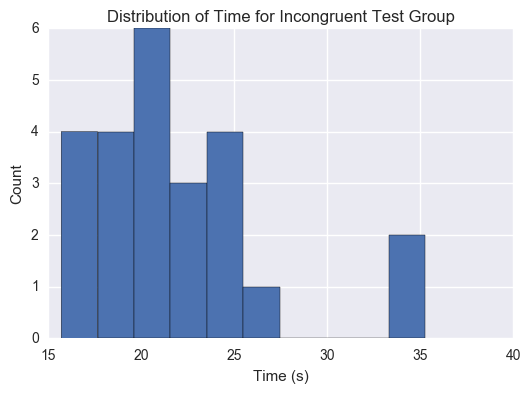

In [9]:
plt.hist(stroop_df['Incongruent'])
plt.title('Distribution of Time for Incongruent Test Group')
plt.xlabel('Time (s)')
plt.ylabel('Count')

The distribution looks positively skewed for both of the test groups. Our non-normal distribution assumption is supported from the graphs we just plotted.

Q5: Conduct one-tailed t test to see if there is any meaningful difference between the two test groups. We choose alpha as 0.05 so we can have a 95% confidence level about the results. Since the variance from the two groups are not very similar to each other. We need to perform Welch's t test.

In [29]:
#Calculate t-statistic and p value
#The variance is unequal so use sd=sqrt(s1^2+s2^2)
stroop_df['Difference']=stroop_df['Incongruent']-stroop_df['Congruent']
stddev=np.std(stroop_df['Difference'],ddof=1)
t=(np.mean(stroop_df['Incongruent'])-np.mean(stroop_df['Congruent']))/(stddev/np.sqrt(24))
t

8.020706944109957

Looking at a Welch's t test table for alpha = 0.05, the t critical value for degrees freedom of 23 (sample size is 24) is 1.714. From the t test, we get our t value to be 8.02 which is much larger than the t critical. The p value is smaller than 0.0005 according to the t table. From this, we can say that we are 95% confident that there is a significant difference between the incongruent test group and congruent test group and we can reject the null hypothesis. This means that it takes longer time in average for participants to correctly name the color of the words when they are incongruent!

Q6: The most probable reason for this is that our brains are programmed to read the words and we are used to read a word before identify what color the word is so it is much faster for us to do what we are most used to do and takes extra effort to do something out of the ordinary.

I think similar tests can be used to test if people have depression by recording the time it takes for people to respond to depression related words. Or a similar task would be classifying things as good or bad and we can correlate certain stereotypical mindset that people have by monitoring the delay time when people classify these things.